In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
data = pd.read_csv("crime_data.csv")
regular_sales_total = data["violent crime"].sum()
#regular_sales_total = walmart_ttl["Weekly_Sales"].values[2]
holiday_sales_total = data["rape"].sum()
#holiday_sales_total = walmart_ttl["Weekly_Sales"].values[1]
weekly_sales = data["population"]
#weekly_sales = walmart_clean["Weekly_Sales"]
ave_temperature = data["robbery"]
ave_fuel_price = data["property crime"]
#ave_fuel_price = walmart_holiday["Fuel_Price"]
un_rate = data["burglary rate"]
#un_rate = walmarrt_holiday["Unemployment"]
holiday_sales = data["motor vehicle theft"]
regular_sales = data["larceny-theft"]
cpi = data["violent crime"]
ave_regular_sales = data["property crime"].mean()
weeks = data["year"]
regular_days = data["burglary"]
holidays = data["year"]
store_number = data["year"]
#store_number = walmart_holiday["Store"]
data.head()


,year,population,violent crime,violent crime rate,murder and non-negligent manslaughter,murder and non-negligent manslaughter rate,rape,rape rate,robbery,robbery rate,aggravated assault,aggravated assault rate,property crime,property crime rate,burglary,burglary rate,larceny-theft,larceny-theft rate,motor vehicle theft,motor vehicle theft rate
0,1994.0,260327021.0,1857670.0,713.6,23326.0,9.0,102216.0,39.3,618949.0,237.8,1113179.0,427.6,12131873.0,4660.2,2712774.0,1042.1,7879812.0,3026.9,1539287.0,591.3
1,1995.0,262803276.0,1798792.0,684.5,21606.0,8.2,97470.0,37.1,580509.0,220.9,1099207.0,418.3,12063935.0,4590.5,2593784.0,987.0,7997710.0,3043.2,1472441.0,560.3
2,1996.0,265228572.0,1688540.0,636.6,19645.0,7.4,96252.0,36.3,535594.0,201.9,1037049.0,391.0,11805323.0,4451.0,2506400.0,945.0,7904685.0,2980.3,1394238.0,525.7
3,1997.0,267783607.0,1636096.0,611.0,18208.0,6.8,96153.0,35.9,498534.0,186.2,1023201.0,382.1,11558475.0,4316.3,2460526.0,918.8,7743760.0,2891.8,1354189.0,505.7
4,1998.0,270248003.0,1533887.0,567.6,16974.0,6.3,93144.0,34.5,447186.0,165.5,976583.0,361.4,10951827.0,4052.5,2332735.0,863.2,7376311.0,2729.5,1242781.0,459.9


In [10]:
data["population"].values[1]

262803276.0

In [5]:
regular_sales_total
markdown_sales_total

types = ["Regular Sales","Markdown Sales"]
sales = data["violent crime rate"]
explode = (0,1)
plt.title("Markdown Sales vs. Regiular Sales")
plt.pie(sales, labels = types, autopct="%1.1f%%", shadow = True)
plt.axis("equal")

NameError: name 'regular_sales_total' is not defined

(-1.1061838370596617,
 1.1002944684314124,
 -1.1076315780836108,
 1.1078778423519793)

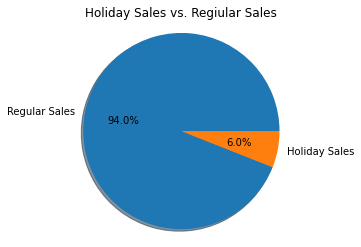

In [15]:
#PIE CHART TOTAL HOLIDAY AND NON HOLIDAY SALES
regular_sales_total
holiday_sales_total

types = ["Regular Sales","Holiday Sales"]
sales = [regular_sales_total, holiday_sales_total]
explode = (0,1)
plt.title("Holiday Sales vs. Regiular Sales")
plt.pie(sales, labels = types, autopct="%1.1f%%", shadow = True)
plt.axis("equal")

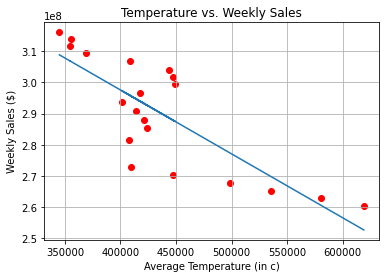

In [14]:
#SCATTER PLOT BY AVERAGE TEMPERATURE
ave_temperature
weekly_sales

plt.title("Temperature vs. Weekly Sales")
plt.xlabel("Average Temperature (C)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(-50,50)
#plt.ylim(0,100000)
plt.grid()
plt.scatter(ave_temperature, weekly_sales, marker="o", color = "red")
slope, intercept, r_value, p_value, std_err = st.linregress(ave_temperature, weekly_sales)
best_fit = slope*ave_temperature+intercept
plt.plot(ave_temperature,best_fit)

In [13]:
#BAR GRAPH by TEMP CATEGORY
plt.bar(walmart_holiday["Temp Category"],walmart_holiday["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.ylim(0,100000)

NameError: name 'walmart_holiday' is not defined

In [ ]:
#TEMPERATURE CATEGORY BY HOLIDAY VS NON HOLIDAY

plt.bar(walmart_holiday["Temp Category"],walmart_holiday["Weekly_Sales"])
plt.xlabel("Temperature (C)")
plt.ylabel("Weekly Sales")
plt.ylim(0,100000)

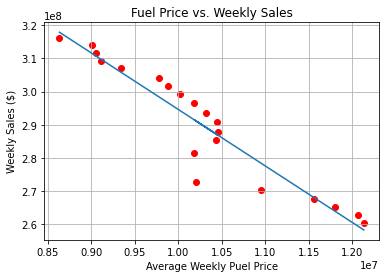

In [114]:
#SCATTER by FUEL PRICE
ave_fuel_price
weekly_sales

plt.title("Fuel Price vs. Weekly Sales")
plt.xlabel("Average Weekly Puel Price")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(2,3)
#plt.ylim(0,100000)
plt.grid()
plt.scatter(ave_fuel_price, weekly_sales, marker="o", color="red")
slope, intercept, r_value, p_value, std_err = st.linregress(ave_fuel_price, weekly_sales)
best_fit = slope*ave_fuel_price+intercept
plt.plot(ave_fuel_price,best_fit)

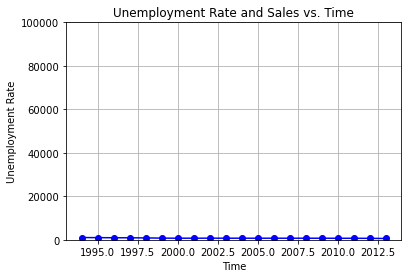

In [115]:
#WEKLY SALES BY UNEMPLOYMENT CATEGORIES
unemp_categories = walmart_holiday["Unemployment Category"]
weekly_sales = walmart_holiday["Weekly_Sales"]

plt.title("Unemployment Rate vs Weekly Sales")
plt.xlabel("Unemployment Rate")
plt.ylabel("Weekly Sales")
plt.ylim(0,100000)
plt.bar(unemp_categories, weekly_sales, marker="o", color="blue")
plt.xlabel("Time")
#plt.ylabel("Sales ($)")
plt.ylim(0,100000)
plt.bar(unemp_categories, weekly_sales, marker="o", color="red")
plt.grid()
plt.show()

In [106]:
#SCATTER UNEMPLOYMENT RATE V SALES
plt.title("Unemployment Rate vs. Sales")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Weekly Sales ($)")
#plt.xlim(8,9)
#plt.ylim(0,100000)
plt.scatter(un_rate, weekly_sales, marker="o", color="red")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.grid()
plt.legend(loc="best")


ValueError: x and y must be the same size

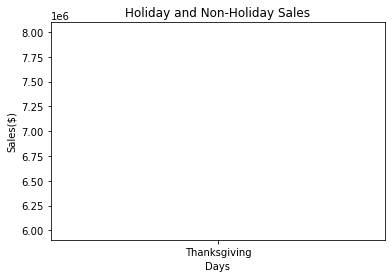

In [88]:
#HOLIDAY SALES VS REGULAR SALES
holidays = ["Thanksgiving","Christmas","Independence Day","New Years"]
#regular_days
holiday_sales
regular_sales
plt.title("Holiday and Non-Holiday Sales")
plt.xlabel("Days")
plt.ylabel("Sales($)")
plt.scatter(regular_days, regular_sales, marker="o", color="red")
plt.scatter(holidays, holiday_sales, marker="x", color = "blue")
#plt.ylim(0,100000)
plt.scatter(regular_days, regular_sales, marker="o", color="red")
#plt.scatter(holidays, holiday_sales, marker="x")
slope, intercept, r_value, p_value, std_err = st.linregress(un_rate, weekly_sales)
best_fit = slope*un_rate+intercept
plt.plot(un_rate,best_fit)
plt.legend(loc="best")
plt.grid()

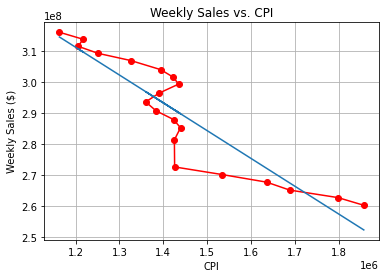

In [75]:
#WEEKLY SALES BY CPI
weekly_sales
cpi
plt.title("Weekly Sales vs. CPI")
plt.ylabel("Weekly Sales ($)")
plt.xlabel("CPI")
#plt.xlim(150,250)
#plt.ylim(0,100000)
plt.plot(cpi,weekly_sales,marker="o", color="red")
slope, intercept, r_value, p_value, std_err = st.linregress(cpi, weekly_sales)
best_fit = slope*cpi+intercept
plt.plot(cpi,best_fit)
plt.legend(loc="best")
plt.grid()


In [16]:
#WEEKLY SALES BY HOLIDAY
weekly_sales = sales_rank["Weekly Sales"]
holidays = sales_rank["Holiday Name"]
plt.bar(holidays, weekly_sales)
plt.xlabel("Day")
plt.ylabel("Weekly Sales")
plt.ylim(0,100000)
plt.legend(loc="best")

NameError: name 'sales_rank' is not defined

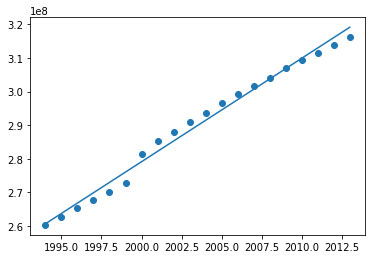

In [110]:
#holiday sales by store number
plt.scatter(store_number, weekly_sales)
slope, intercept, r_value, p_value, std_err = st.linregress(store_number, weekly_sales)
best_fit = slope*store_number+intercept
plt.plot(store_number,best_fit)
plt.legend(loc="best")
plt.show()

In [ ]:
#SCATTER OF ALL HOLIDAYS
christmas = walmart_holiday.loc[walmart_holiday["Holiday Name"]=="Christmas"]
thanksgiving = walmart_holiday.loc[walmart_holiday["Holiday Name"]=="Thanksgiving"]
independence_day = walmart_holiday.loc[walmart_holiday["Holiday Name"]=="Independence Day"]
new_years = walmart_holiday.loc[walmart_holiday["Holiday_Name"]=="New Year"]
no_holiday = walmart_holiday.loc[walmart_holiday["Holiday_Name"]=="No Holiday"
date = walmart_holiday["date"]
weekly_xmas_sales = christmas["Weekly_Sales"]
weekly_thanks_sales = thanksgiving["Weekly_Sales"]
weekly_ind_sales = independence_day["Weekly_Sales"]
weekly_ny_sales = new_years["Weekly_Sales"]
weekly_regular_sales = no_holiday["Weekly Sales"]
plt.scatter(date,weekly_xmas_sales,marker="o",color="red")
plt.scatter(date,weekly_thanks_sales,marker="o",color="blue")
plt.scatter(date,weekly_ind_sales,marker="o",color="green")
plt.scatter(date,weekly_ny_sales,marke="o",color="yellow")
plt.scatter(date,weekly_regular_sales,marker="o",color="orange")       
plt.legend(loc="best")
plt.ylim = (0,5000000)